In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import librosa 
from scipy.fftpack import fft
import pywt

In [5]:
# read .mat file
from scipy.io import loadmat
mat = loadmat('data/VEH_FEATURES_MULTI/GC_ratID3_veh.mat')
# mat = loadmat('data/VEH_HPCpyra/HPCpyra_events_ratID3.mat')
# mat = loadmat('data/PFCshal/PFCshal_events_ratID3.mat')
mat.keys()


'3'

In [137]:
dataset = 'GC_complex_swr_ratID3_veh'
# mat[dataset]['HPCbelo_trace'][0,0][0,0]   
mat[dataset]['waveforms'][0,0][0,0].shape
np.array(mat[dataset]['waveforms'][0,0].ravel().tolist()).shape

(51, 4, 3601)

In [47]:
pd.DataFrame(mat[dataset]).shape#.iloc[:,10]

(51, 3601)

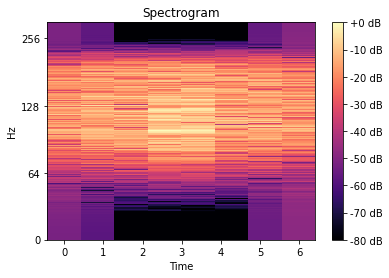

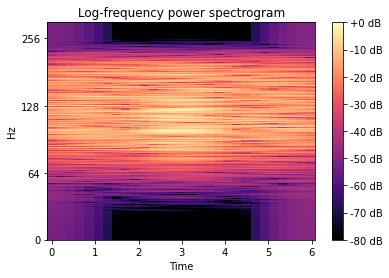

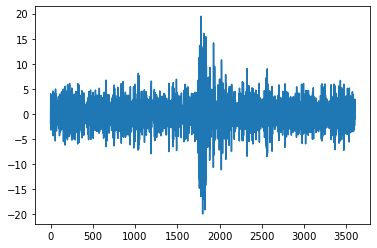

In [6]:

y, sr = mat[dataset][0] , 600

spec = np.abs(librosa.stft(y,))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')



fig, ax = plt.subplots()

hop_length = 128

D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
img = librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,

                         x_axis='time', ax=ax)
ax.set(title='Log-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

fig, ax = plt.subplots()

plt.plot(mat[dataset][0])

(1200,)


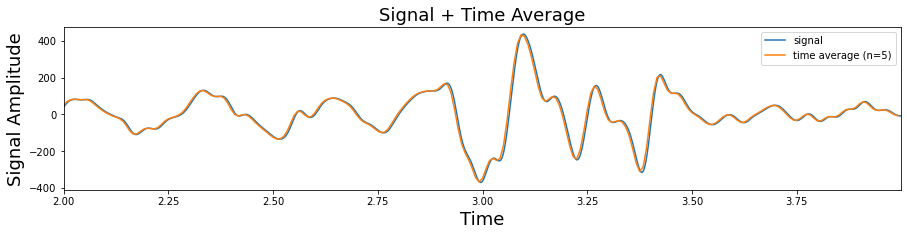

(600,) (600,)


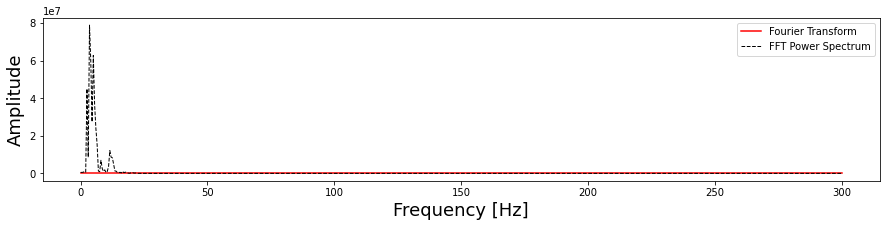

scale pseudo frequencies [30.46875    20.53328804 15.48411885 12.42804276 10.37946429  8.91067217
  7.80604339  6.94508272  6.25517384  5.68994729  5.2184047   4.81903699
  4.47645142  4.17934181  3.9192168   3.6895752   3.48535517  3.30255682
  3.13797757  2.98902294  2.85356873  2.7298591   2.61643006  2.5120512
  2.41568095  2.32643165  2.24354216  2.16635608  2.09430432  2.02689109
  1.96368243  1.90429687] (32,)


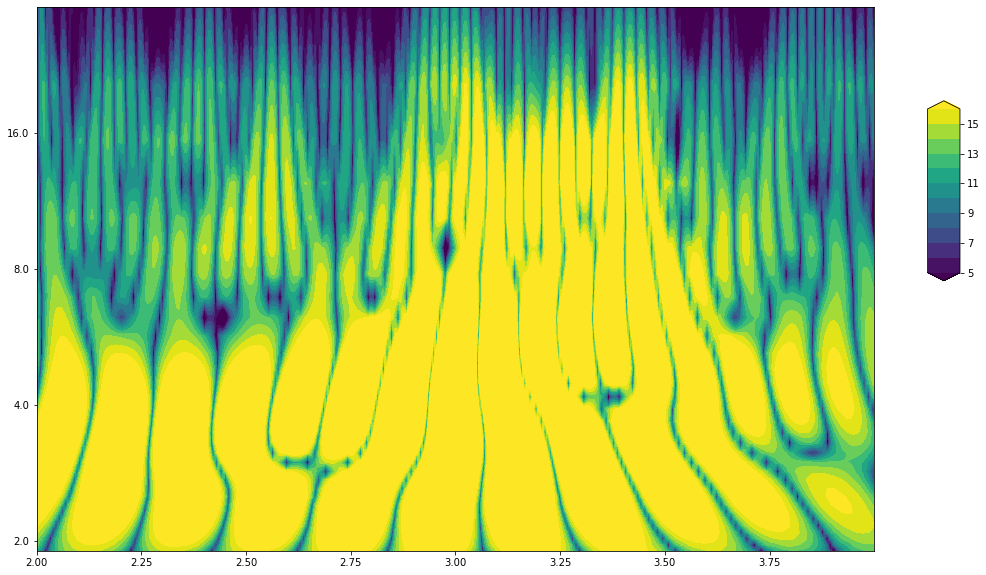

scale pseudo frequencies [37.5        25.27173913 19.05737705 15.29605263 12.77472527 10.96698113
  9.60743802  8.54779412  7.6986755   7.00301205  6.42265193  5.93112245
  5.50947867  5.14380531  4.82365145  4.54101562  4.2896679   4.06468531
  3.86212625  3.67879747  3.51208459  3.35982659  3.22022161  3.09175532
  2.97314578  2.86330049  2.76128266  2.6662844   2.57760532  2.49463519
  2.41683992  2.34375   ] (32,)


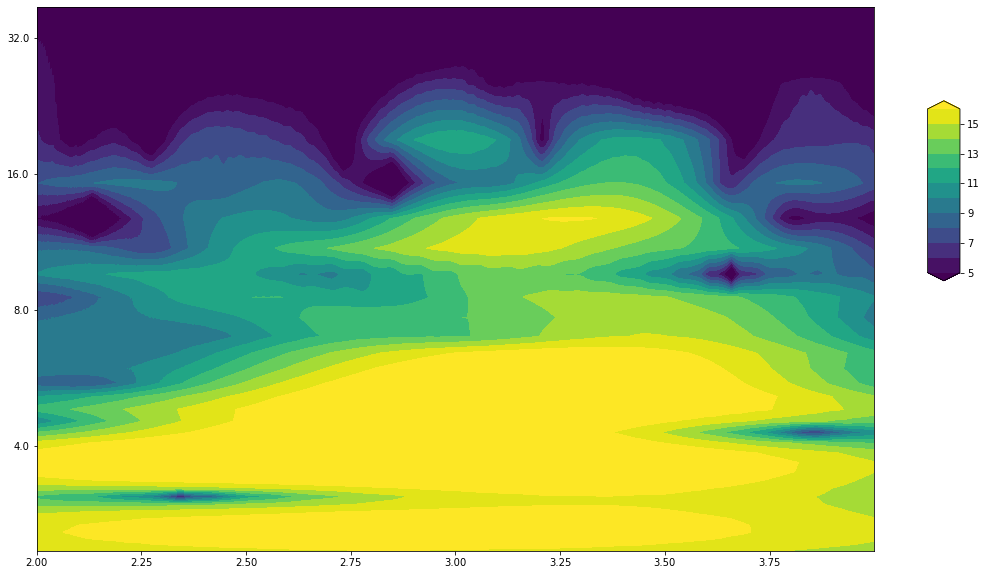

In [121]:

#taken from https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/
def plot_wavelet_freq(time, signal, scales, 
                 waveletname = 'mor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,16,32,64,128,256,512,1024,2048,]
    levels = [32,64,128,256,512,1024,2048,4096,8192,16384,32768,65536]
    contourlevels = np.log2(levels)
    print('scale pseudo frequencies',frequencies,frequencies.shape)
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(frequencies), np.log2(power), contourlevels, extend='both',cmap=cmap)
        
    yticks =  2**np.arange(np.ceil(np.log2(frequencies.min())), np.ceil(np.log2(frequencies.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")

    plt.show()

def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()


def plot_signal_plus_average(time, signal, average_over = 5):
    fig, ax = plt.subplots(figsize=(15, 3))
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
    plt.show()
    
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft_plus_power(time, signal):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    
    fig, ax = plt.subplots(figsize=(15, 3))
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2     # FFT power spectrum
    print(f_values.shape, fft_values.shape)
    ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    ax.set_xlabel('Frequency [Hz]', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend()
    plt.show()
    return f_values,fft_power
def get_ave_values(xvalues, yvalues, n = 5):
    signal_length = len(xvalues)
    if signal_length % n == 0:
        padding_length = 0
    else:
        padding_length = n - signal_length//n % n
    xarr = np.array(xvalues)
    yarr = np.array(yvalues)
    xarr.resize(signal_length//n, n)
    yarr.resize(signal_length//n, n)
    xarr_reshaped = xarr.reshape((-1,n))
    yarr_reshaped = yarr.reshape((-1,n))
    x_ave = xarr_reshaped[:,0]
    y_ave = np.nanmean(yarr_reshaped, axis=1)
    return x_ave, y_ave


df, sr= pd.DataFrame(mat[dataset]['waveforms'][0,0][0,0][2]), 600#pd.DataFrame(mat[dataset][0]), 600
#swr
#does 0,7,8 counts as two ripples?
#complex
#5 is not aligned
#does 6 counts as two ripples?
N = df.shape[0]
t0=0
dt=1/sr
duration = 2
time = np.arange(int(N/2 - duration/2*sr), int(N/2 + duration/2*sr)) * dt + t0
signal = df.values.squeeze()[int(N/2-duration/2*sr):int(N/2+ duration/2*sr)]
print(time.shape)
scales = np.linspace(16,256, 32)#np.arange(1, 124)

plot_signal_plus_average(time, signal)
f_values,fft_power = plot_fft_plus_power(time, signal)
# plot_wavelet(time, signal, scales)
plot_wavelet_freq(time, signal, scales,waveletname='morl',cmap=None)

plot_wavelet_freq(time, signal, scales,waveletname='cmor10.5-1.0',cmap=None)

# duration = 0.4
# time = np.arange(int(N/2 - duration/2*sr), int(N/2 + duration/2*sr)) * dt + t0
# signal = df.values.squeeze()[int(N/2-duration/2*sr):int(N/2+ duration/2*sr)]
# plot_signal_plus_average(time, signal)



In [105]:
#check relation between scales and frequencies
print(pywt.scale2frequency('cmor1.5-1.0',np.linspace(16,256, 32))/dt)
pywt.scale2frequency('morl',np.linspace(16,256, 32))/dt
# 2**7
600
# pywt.wavelist(kind='continuous')

[37.5        25.27173913 19.05737705 15.29605263 12.77472527 10.96698113
  9.60743802  8.54779412  7.6986755   7.00301205  6.42265193  5.93112245
  5.50947867  5.14380531  4.82365145  4.54101562  4.2896679   4.06468531
  3.86212625  3.67879747  3.51208459  3.35982659  3.22022161  3.09175532
  2.97314578  2.86330049  2.76128266  2.6662844   2.57760532  2.49463519
  2.41683992  2.34375   ]


0.0016666666666666668

,f_values,fft_power
2,1.001669,12548.064752
4,2.003339,7653.558103
8,4.006678,3401.518685
6,3.005008,3351.596116
1,0.500835,2822.798940
9,4.507513,1825.049127
15,7.512521,1308.847188
5,2.504174,1221.434490
7,3.505843,1156.307745
28,14.023372,1027.993110


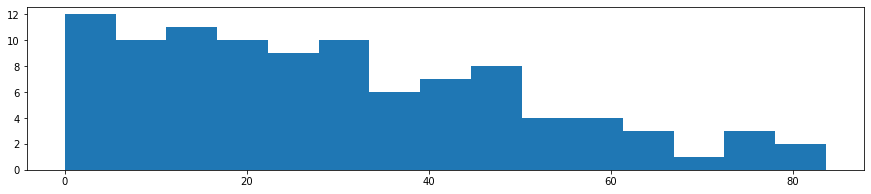

In [27]:
#pandas configure max display rows
pd.set_option('display.max_rows', None)

df =pd.DataFrame([f_values,fft_power]).T
df.columns = ['f_values','fft_power']
df.sort_values(by='fft_power', ascending=False, inplace=True)
df = df.head(100)
#plot histogram with first 100 fft power values
fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(df['f_values'], bins=15, density=False, label='FFT Power Spectrum')
df

Create csv with class distribution

In [18]:
import h5py
import json
root_dir = 'proc_data/HPC_VEH_PYRA/'
data_df = pd.DataFrame(os.listdir(root_dir), columns=['filename'])
#remove rows with .csv in filename
data_df = data_df[~data_df['filename'].str.contains('.csv')]
data_df['rat_id'] = data_df.filename.apply(lambda x: int(x.split('_')[1].split('ratID')[1]))
data_df.rat_id.unique()
sizes = []
label_dict = {'complex':[], 'ripple':[], 'swr':[]}

for file in data_df.filename:
    print(file)
    #load h5 file
    f = h5py.File(root_dir+file, 'r')
    label_arr = json.loads(f.attrs['data_types'])
    print(label_arr)
    #get size of dataset
    sizes.append(f['x'].shape)
    y = pd.Series(f['y']).apply(lambda x: label_arr[str(x)])
    # print(y.value_counts(),y[(~y.str.contains('complex')) & (y.str.contains('swr'))].shape[0])
    label_dict['complex'].append(y[y.str.contains('complex')].shape[0]) 
    label_dict['ripple'].append(y[y.str.contains('ripple')].shape[0])
    label_dict['swr'].append(y[~y.str.contains('complex') & y.str.contains('swr')].shape[0])
    f.close()
    # break
data_df['sizes'] = sizes
data_df['complex'] = label_dict['complex']
data_df['swr'] = label_dict['swr']
data_df['ripple'] = label_dict['ripple']
data_df


dataset_ratID3_HPCpyra.hdf5
{'0': 'complex', '1': 'swr', '2': 'ripple'}
dataset_ratID213_HPCpyra.hdf5
{'0': 'complex', '1': 'swr', '2': 'ripple'}
dataset_ratID201_HPCpyra.hdf5
{'0': 'complex', '1': 'swr', '2': 'ripple'}
dataset_ratID211_HPCpyra.hdf5
{'0': 'complex', '1': 'swr', '2': 'ripple'}
dataset_ratID206_HPCpyra.hdf5
{'0': 'complex', '1': 'swr', '2': 'ripple'}
dataset_ratID4_HPCpyra.hdf5
{'0': 'complex', '1': 'swr', '2': 'ripple'}
dataset_ratID210_HPCpyra.hdf5
{'0': 'complex', '1': 'swr', '2': 'ripple'}
dataset_ratID203_HPCpyra.hdf5
{'0': 'complex', '1': 'swr', '2': 'ripple'}
dataset_ratID9_HPCpyra.hdf5
{'0': 'complex', '1': 'swr', '2': 'ripple'}


,filename,rat_id,sizes,complex,swr,ripple
0,dataset_ratID3_HPCpyra.hdf5,3,"(210, 8, 108)",51,130,29
1,dataset_ratID213_HPCpyra.hdf5,213,"(300, 8, 108)",107,139,54
2,dataset_ratID201_HPCpyra.hdf5,201,"(1616, 8, 108)",167,446,1003
4,dataset_ratID211_HPCpyra.hdf5,211,"(925, 8, 108)",276,488,161
6,dataset_ratID206_HPCpyra.hdf5,206,"(1079, 8, 108)",354,558,167
7,dataset_ratID4_HPCpyra.hdf5,4,"(546, 8, 108)",291,230,25
8,dataset_ratID210_HPCpyra.hdf5,210,"(1005, 8, 108)",80,409,516
9,dataset_ratID203_HPCpyra.hdf5,203,"(1018, 8, 108)",262,488,268
10,dataset_ratID9_HPCpyra.hdf5,9,"(1850, 8, 108)",179,881,790


In [21]:
import h5py
import json
root_dir = 'proc_data/HPC_VEH_BELO/'
data_df = pd.DataFrame(os.listdir(root_dir), columns=['filename'])
#remove rows with .csv in filename
data_df = data_df[~data_df['filename'].str.contains('.csv')]
data_df['rat_id'] = data_df.filename.apply(lambda x: int(x.split('_')[1].split('ratID')[1]))
data_df.rat_id.unique()
sizes = []
label_dict = {'complex':[], 'sw':[], 'swr':[]}

for file in data_df.filename:
    print(file)
    #load h5 file
    f = h5py.File(root_dir+file, 'r')
    label_arr = json.loads(f.attrs['data_types'])
    #get size of dataset
    sizes.append(f['x'].shape)
    y = pd.Series(f['y']).apply(lambda x: label_arr[str(x)])
    # print(y.value_counts(),y[(~y.str.contains('complex')) & (y.str.contains('swr'))].shape[0])
    label_dict['complex'].append(y[y.str.contains('complex')].shape[0]) 
    label_dict['sw'].append(y[y.str.contains('sw') & ~y.str.contains('swr')].shape[0])
    label_dict['swr'].append(y[~y.str.contains('complex') & y.str.contains('swr')].shape[0])
    f.close()
    # break
data_df['sizes'] = sizes
data_df['complex'] = label_dict['complex']
data_df['swr'] = label_dict['swr']
data_df['sw'] = label_dict['sw']
data_df


dataset_ratID4_HPCbelo.hdf5
dataset_ratID210_HPCbelo.hdf5
dataset_ratID201_HPCbelo.hdf5
dataset_ratID211_HPCbelo.hdf5
dataset_ratID9_HPCbelo.hdf5
dataset_ratID206_HPCbelo.hdf5
dataset_ratID3_HPCbelo.hdf5
dataset_ratID203_HPCbelo.hdf5
dataset_ratID213_HPCbelo.hdf5


,filename,rat_id,sizes,complex,swr,sw
0,dataset_ratID4_HPCbelo.hdf5,4,"(864, 32, 108)",291,230,343
1,dataset_ratID210_HPCbelo.hdf5,210,"(740, 32, 108)",80,409,251
2,dataset_ratID201_HPCbelo.hdf5,201,"(3624, 32, 108)",167,446,3011
3,dataset_ratID211_HPCbelo.hdf5,211,"(1583, 32, 108)",276,488,819
4,dataset_ratID9_HPCbelo.hdf5,9,"(2610, 32, 108)",179,881,1550
5,dataset_ratID206_HPCbelo.hdf5,206,"(3310, 32, 108)",354,558,2398
7,dataset_ratID3_HPCbelo.hdf5,3,"(561, 32, 108)",51,130,380
8,dataset_ratID203_HPCbelo.hdf5,203,"(1462, 32, 108)",262,488,712
9,dataset_ratID213_HPCbelo.hdf5,213,"(744, 32, 108)",107,139,498


In [7]:
label_arr

['GC_complex_swr_ratID206_veh', 'GC_sw_ratID206_veh', 'GC_swr_ratID206_veh']

In [22]:
data_df.to_csv('veh_belo_class_distribution.csv', index=False)